In [ ]:
#Импортируем необходимые библиотеки
import numpy as np
import pandas as pd


In [ ]:
# Загрузим датасет и посмотрим его структуру
schema = pd.read_csv('/content/drive/MyDrive/survey_results_schema.csv')
df = pd.read_csv('/content/drive/MyDrive/survey_results_public.csv')

In [ ]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [ ]:
#ResponseId                          73268 non-null  int64 - id -
#MainBranch                          73268 non-null  object- основная отрасль -
#Employment                          71709 non-null  object - работа
#RemoteWork                          58958 non-null  object - режим работы
#CodingActivities                    58899 non-null  object                   -
#EdLevel                             71571 non-null  object - образование
#LearnCode                           71580 non-null  object - где изучали програмирование -
#LearnCodeOnline                     50685 non-null  object - пройденные онлан курсы по программированию
#LearnCodeCoursesCert                29389 non-null  object - сертификаты о прохождении курса
#YearsCode                           71331 non-null  object - количество лет в программировании
#YearsCodePro                        51833 non-null  object - количество лет в программировании за исключением учебы
#DevType                             61302 non-null  object - Тип разработки
#OrgSize                             51039 non-null  object - размер оргнанизации
#PurchaseInfluence                   50969 non-null  object - влияние на рзработку
#BuyNewTool                          67963 non-null  object - как выбирается новый софт для разработки
#Country                             71771 non-null  object - страна
#Currency                            51264 non-null  object - валюта
#CompTotal                           38422 non-null  float64- зарплата
#CompFreq                            44425 non-null  object - за какой период з/п
# LanguageHaveWorkedWith             70975 non-null  object - Язык програмирования с которым вы работаете в настоящее время
#LanguageWantToWorkWith              67027 non-null  object - Язык программирования с которым  хотел бы работать
#DatabaseHaveWorkedWith              60121 non-null  object - База данных  с которым вы работаете в настоящее время
#DatabaseWantToWorkWith          51014 non-null  object -  База данных  с которым вы работаете в настоящее время

In [ ]:
# Посмотрим на уровень зарплаты людей прошедших опрос в разрезе по странам
# Для этого из датафрейма берем необходимые для расчета столбцы
df1 = df[['Country', 'CompTotal', 'Currency', 'CompFreq']]

In [ ]:
#Удаляем из выборки пустые значения
df1.dropna(inplace=True)

<ipython-input-92-07f83e1fec73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38347 entries, 2 to 73266
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    38347 non-null  object 
 1   CompTotal  38347 non-null  float64
 2   Currency   38347 non-null  object 
 3   CompFreq   38347 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Выбираем страны в которой приняли участия в опросе хотя 1000 пользователей
df1.Country.value_counts().head(10)

United States of America                                8762
Germany                                                 2923
United Kingdom of Great Britain and Northern Ireland    2668
India                                                   2226
Canada                                                  1485
France                                                  1382
Brazil                                                  1289
Spain                                                   1000
Poland                                                   981
Netherlands                                              904
Name: Country, dtype: int64

In [ ]:
df1 = df1[df1.Country.isin(['United States of America', 'Germany', 'United Kingdom of Great Britain and Northern Ireland', 'India', 'Canada', 'France', 'Brazil', 'Spain'])]

In [ ]:
# Переводим все зарплаты в единую валюту и выводим зарплату за год( год будем считать равным 365 дням, месяц- 30 дней, неделя - 7 дней)
Cur = {}
for i in df1.Currency.unique():
  Cur[i] = i[0:3]
Cur.values()

dict_values(['GBP', 'USD', 'CAD', 'EUR', 'BRL', 'INR', 'IMP', 'GIP', 'AZN', 'AUD', 'IRR', 'KYD', 'CHF', 'AWG', 'CZK', 'OMR', 'DJF', 'JPY', 'IDR', 'NZD', 'XPF', 'MAD', 'TND', 'UGX', 'AED', 'BDT', 'ZMW'])

In [ ]:
well ={'GBP' : 1.31,
       'EUR' : 1.12,
       'USD' : 1,
       'CAD' : 0.76,
       'BRL' : 0.21,
       'INR' : 0.012,
       'IMP' : 1.31,
       'GIP' : 1.29050,
       'AZN' : 0.59,
       'AUD' : 0.68,
       'IRR' : 0.000024,
       'KYD' : 3.27,
       'CHF' : 1.16,
       'AWG' : 0.55,
       'CZK' : 0.047,
       'OMR' : 2.60,
       'DJF' : 0.0056,
       'JPY' : 0.0072,
       'IDR' : 0.000067,
       'NZD' : 0.64,
       'XPF' : 0.0017,
       'MAD' : 0.1,
       'TND' : 0.000042,
       'UGX' : 0.00027,
       'AED' : 0.27,
       'BDT' : 0.0092,
       'ZMW' : 0.054
       }

In [ ]:
f = lambda x: Cur[x]
f1 = lambda x: x['CompTotal'] * well[x['cod_currency']]

In [ ]:
df1 ['cod_currency'] =df1.Currency.map(f)
df1['salary_usd'] = df1.apply(f1, axis=1)

In [ ]:
df1.CompFreq.unique()

array(['Yearly', 'Monthly', 'Weekly'], dtype=object)

In [ ]:
days = {'Yearly' : 365,
        'Monthly': 30,
        'Weekly' : 7}

In [ ]:
salary = lambda x:round((x['salary_usd'] / days[x['CompFreq']]) *365, 2)


In [ ]:
df1['salary'] = df1.apply(salary, axis = 1)

In [ ]:
df1.describe()

,CompTotal,salary_usd,salary
count,2.173500e+04,2.173500e+04,2.173500e+04
mean,4.600874e+47,4.600874e+47,2.399027e+49
std,6.782974e+49,6.782974e+49,3.536837e+51
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.870050e+04,3.710525e+04,5.043500e+04
50%,9.300000e+04,8.064000e+04,9.000000e+04
75%,1.600000e+05,1.350000e+05,1.500000e+05
max,1.000000e+52,1.000000e+52,5.214286e+53


In [ ]:
# Возьмем в выборку только тех людей которые получали доход в год от 1000 до 10000
df1 = df1.loc[((df1['salary'] >= 10000) &(df1['salary'] <= 10000000))]

In [ ]:
df1.describe()

,CompTotal,salary_usd,salary
count,2.065000e+04,2.065000e+04,2.065000e+04
mean,2.741324e+05,1.022138e+05,2.183081e+05
std,3.626214e+06,1.144114e+05,6.793800e+05
min,1.600000e+02,2.000000e+02,1.000000e+04
25%,5.000000e+04,4.560000e+04,5.600000e+04
50%,9.500000e+04,8.500000e+04,9.468850e+04
75%,1.590000e+05,1.380000e+05,1.550000e+05
max,5.100000e+08,6.120000e+06,9.907143e+06


In [ ]:
bins =np.array([10000, 50000,100000, 500000, 1000000, 5000000, 10000000])
labels = pd.cut(df1.salary, bins)
labels

2          (10000, 50000]
10        (50000, 100000]
11       (100000, 500000]
12        (50000, 100000]
14       (100000, 500000]
               ...       
73254    (100000, 500000]
73258      (10000, 50000]
73261      (10000, 50000]
73264    (100000, 500000]
73266     (50000, 100000]
Name: salary, Length: 20650, dtype: category
Categories (6, interval[int64, right]): [(10000, 50000] < (50000, 100000] < (100000, 500000] <
                                         (500000, 1000000] < (1000000, 5000000] <
                                         (5000000, 10000000]]

In [ ]:
grouped_salary = df1.groupby(['Country', labels])

In [ ]:
grouped_salary.size().unstack(0)

Country,Brazil,Canada,France,Germany,India,Spain,United Kingdom of Great Britain and Northern Ireland,United States of America
salary,,,,,,,,
"(10000, 50000]",842,133,556,455,1136,473,413,207
"(50000, 100000]",220,740,627,1803,179,331,1175,1789
"(100000, 500000]",89,523,138,494,124,132,801,6115
"(500000, 1000000]",4,23,35,98,16,42,164,114
"(1000000, 5000000]",4,48,12,48,10,9,89,292
"(5000000, 10000000]",0,9,0,0,1,0,2,131


In [ ]:
salary_sums = grouped_salary.salary.sum().unstack(0)
salary_sums

Country,Brazil,Canada,France,Germany,India,Spain,United Kingdom of Great Britain and Northern Ireland,United States of America
salary,,,,,,,,
"(10000, 50000]",21584342.39,5.298898e+06,20951131.67,1.722570e+07,27581365.97,15961038.52,1.606192e+07,7.695662e+06
"(50000, 100000]",15011275.46,5.601733e+07,41599050.52,1.287922e+08,11790095.52,21821857.06,8.673613e+07,1.475850e+08
"(100000, 500000]",14693683.44,7.823021e+07,22716983.97,6.809462e+07,26784742.60,29700035.35,1.296764e+08,1.088272e+09
"(500000, 1000000]",2634083.33,1.731052e+07,24075594.67,7.666933e+07,11481116.67,28397973.34,1.186247e+08,8.492327e+07
"(1000000, 5000000]",7336832.44,1.150884e+08,23415966.67,6.510004e+07,18643338.10,11703603.34,1.313263e+08,6.777689e+08
"(5000000, 10000000]",0.00,5.373634e+07,0.00,0.000000e+00,6120000.00,0.00,1.147560e+07,9.223086e+08


In [ ]:
normed_salary = salary_sums.div(salary_sums.sum(axis = 1), axis = 0)
normed_salary = normed_salary.apply(lambda x: x*100, axis=0)

<Axes: title={'center': 'Годовая заработная плата программистов в различных странах'}, xlabel='Процент', ylabel='Диапозон заработной платы'>

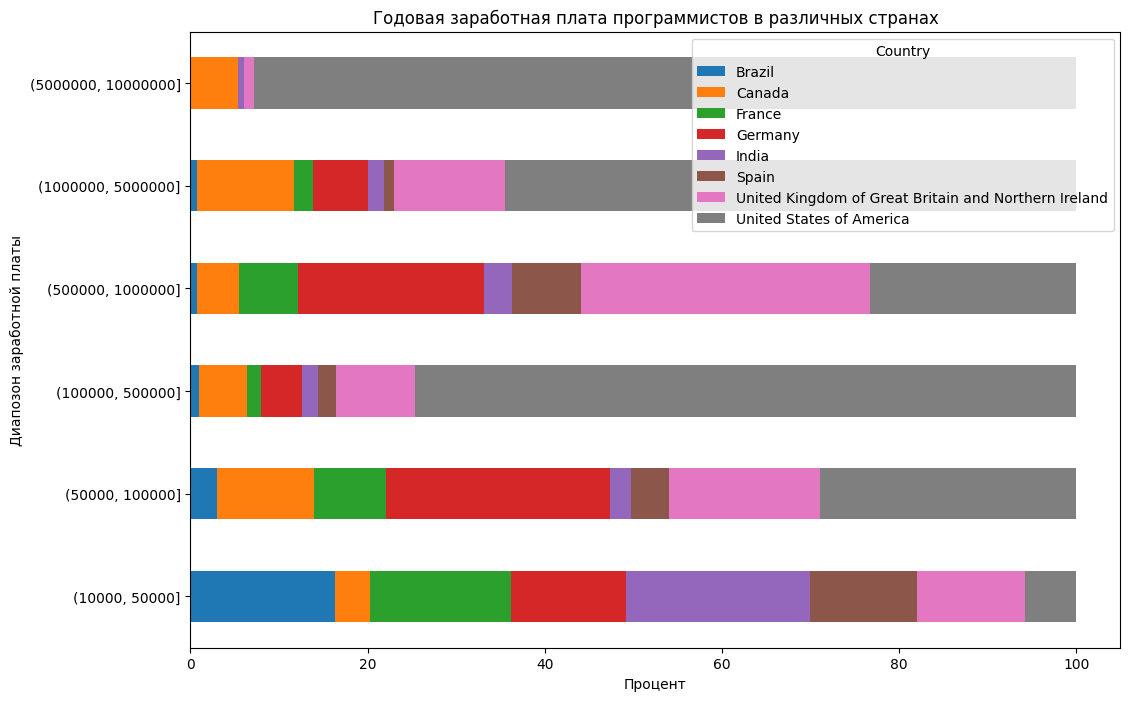

In [ ]:
normed_salary.plot(kind='barh', stacked=True, figsize=(12,8), title='Годовая заработная плата программистов в различных странах', xlabel= 'Процент', ylabel= 'Диапозон заработной платы')

Вывод: В результате исслеование установлено, что наивысший уровень зарплаты среди программистов, наюлюдается у программистов из Соединенных штатов Америки


In [ ]:
df3 = df[['YearsCode', 'Gender']]

In [ ]:
df3.dropna(inplace=True)

<ipython-input-163-1cb041b5c165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [ ]:
df3.YearsCode.unique()

array(['14', '20', '15', '3', '1', '6', '37', '5', '12', '22', '11', '4',
       '7', '13', '36', '2', '25', '10', '40', '16', '27', '24', '8',
       '19', '9', '17', '18', '26', 'More than 50 years', '29', '30',
       '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23', '43',
       '21', '41', '35', '50', '33', '31', '34', '44', '42', '46', '47',
       '49'], dtype=object)

In [ ]:
Code_years = {'More than 50 years': '51',
              'Less than 1 year' : '0'}
f = lambda x: Code_years.get(x,x)

In [ ]:
df3['YearsCodeNew'] = df3.YearsCode.map(f)

<ipython-input-166-c8058e360528>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['YearsCodeNew'] = df3.YearsCode.map(f)


In [ ]:
df3.Gender.value_counts()

Man                                                                                   64328
Woman                                                                                  3366
Prefer not to say                                                                      1152
Non-binary, genderqueer, or gender non-conforming                                       698
Or, in your own words:                                                                  275
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              170
Woman;Non-binary, genderqueer, or gender non-conforming                                 158
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              30
Man;Woman                                                                                23
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [ ]:
Gender = {'Man;Non-binary, genderqueer, or gender non-conforming': 'Man',
          'Man;Or, in your own words:': 'Man',
          'Woman;Non-binary, genderqueer, or gender non-conforming': 'Woman',
          'Or, in your own words:;Woman': 'Woman',
          'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming': 'Man'}
f2 = lambda x: Gender.get(x,x)

In [ ]:
df3['sex'] = df3.Gender.map(f2)

<ipython-input-169-1b7f86992010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sex'] = df3.Gender.map(f2)


In [ ]:
df3 = df3[df3.sex.isin(['Man', 'Woman'])]


In [ ]:
df3 = df3.drop(['Gender', 'YearsCode'], axis= 1)

In [ ]:
df3.YearsCodeNew.unique()

array(['14', '20', '3', '1', '6', '37', '5', '12', '22', '11', '4', '7',
       '13', '36', '2', '25', '10', '40', '16', '27', '24', '19', '15',
       '8', '9', '17', '18', '26', '51', '29', '30', '32', '0', '48',
       '45', '38', '39', '28', '23', '43', '21', '41', '35', '50', '33',
       '31', '34', '44', '42', '46', '47', '49'], dtype=object)

In [ ]:
df3 = df3.astype({'YearsCodeNew': 'int32'})
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68278 entries, 2 to 73267
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearsCodeNew  68278 non-null  int32 
 1   sex           68278 non-null  object
dtypes: int32(1), object(1)
memory usage: 1.3+ MB


In [ ]:
range_year = np.array([-1,1,5,10,20,30,40,50,51])
label = pd.cut(df3.YearsCodeNew, range_year)
group_sex = df3.groupby(['sex', label])
group_sex.size().unstack()

YearsCodeNew,"(-1, 1]","(1, 5]","(5, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 51]"
sex,,,,,,,,
Man,2477,15329,18923,16625,7072,3245,914,156
Woman,318,1027,1138,736,206,78,29,5


<Axes: title={'center': 'Количество программистов в разрезе опыта и пола'}, xlabel='Опыт', ylabel='Количество программистов'>

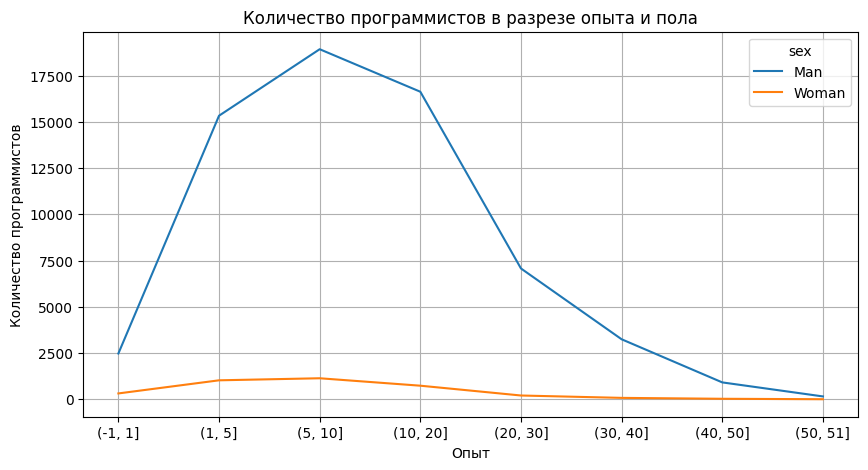

In [ ]:
group_sex.size().unstack(0).plot(figsize =(10,5), title='Количество программистов в разрезе опыта и пола', ylabel='Количество программистов', xlabel = 'Опыт', grid= True)

Вывод: В результате исследования установлено, наибольшее число программистов имеют опыт от 5- 10 лет, кроме того доля программистов женского пола в последние года увеличивается.

In [ ]:
df4 = df['LanguageHaveWorkedWith']

In [ ]:
df4.dropna(inplace=True)

In [ ]:
df4

1                                    JavaScript;TypeScript
2                        C#;C++;HTML/CSS;JavaScript;Python
3                             C#;JavaScript;SQL;TypeScript
4              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
5                                                  C++;Lua
                               ...                        
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73266                                        C#;Delphi;VBA
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 70975, dtype: object

In [ ]:
language = {}

for i in df4.unique():
  for j in i.split(';'):
    language[j] = language.get(j, 0) +1


{'JavaScript': 17164,
 'TypeScript': 9961,
 'C#': 8746,
 'C++': 9751,
 'HTML/CSS': 14633,
 'Python': 15267,
 'SQL': 14273,
 'Swift': 2506,
 'Lua': 2478,
 'PHP': 6884,
 'C': 9178,
 'Java': 11923,
 'Delphi': 1253,
 'Bash/Shell': 11124,
 'PowerShell': 5074,
 'Rust': 4754,
 'Elixir': 1153,
 'Erlang': 565,
 'Ruby': 2776,
 'R': 2303,
 'Scala': 1402,
 'VBA': 2237,
 'Dart': 3231,
 'Go': 5355,
 'Kotlin': 4326,
 'Groovy': 1743,
 'MATLAB': 2345,
 'Perl': 1447,
 'Haskell': 1444,
 'Julia': 805,
 'LISP': 881,
 'Assembly': 3329,
 'F#': 605,
 'Clojure': 777,
 'APL': 369,
 'Crystal': 305,
 'Fortran': 561,
 'Objective-C': 1396,
 'SAS': 343,
 'OCaml': 391,
 'Solidity': 844,
 'COBOL': 411}

In [ ]:
df_language = pd.DataFrame(list(sorted(language.items(), key= lambda x: x[1], reverse=True)), columns=['language', 'count_programmers'])

In [ ]:
df_language.iloc[0:5,:]

,language,count_programmers
0,JavaScript,17164
1,Python,15267
2,HTML/CSS,14633
3,SQL,14273
4,Java,11923


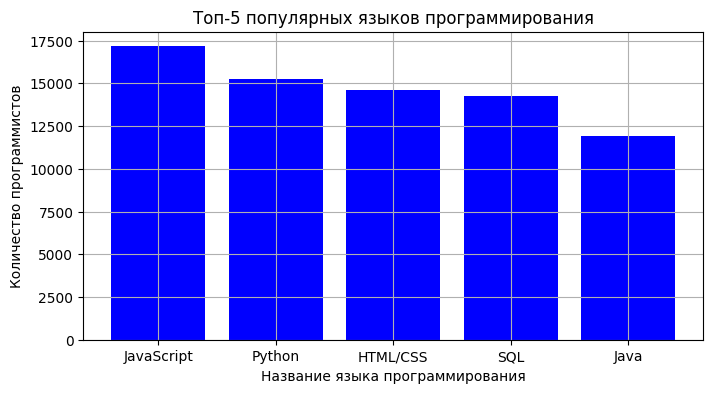

In [ ]:
import matplotlib.pyplot as plt
x= list(df_language.iloc[:5,0])
y = list(df_language.iloc[:5,1])
plt.figure(figsize=(8,4))
plt.bar(x,y, color= 'blue')
plt.title('Топ-5 популярных языков программирования')
plt.xlabel('Название языка программирования')
plt.ylabel('Количество программистов')
plt.grid()